In [8]:
import tensorflow as tf
import numpy as np
import pickle


In [10]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_7_2.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:976320, :]
#x_test = input_data[971320:976320, :]


(976320, 24)


In [11]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_7_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:976320, :]
#y_test = output_data[971320:976320, :]
print(output_data.shape)

(976320, 12)


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 10, verbose = 2)#, validation_data = (x_test, y_test))


Train on 971320 samples
Epoch 1/10
971320/971320 - 11s - loss: 0.1721 - accuracy: 0.9213
Epoch 2/10
971320/971320 - 12s - loss: 0.0738 - accuracy: 0.9690
Epoch 3/10
971320/971320 - 11s - loss: 0.0402 - accuracy: 0.9845
Epoch 4/10
971320/971320 - 10s - loss: 0.0264 - accuracy: 0.9903
Epoch 5/10
971320/971320 - 10s - loss: 0.0197 - accuracy: 0.9929
Epoch 6/10
971320/971320 - 10s - loss: 0.0160 - accuracy: 0.9943
Epoch 7/10
971320/971320 - 10s - loss: 0.0136 - accuracy: 0.9952
Epoch 8/10
971320/971320 - 11s - loss: 0.0117 - accuracy: 0.9959
Epoch 9/10
971320/971320 - 12s - loss: 0.0105 - accuracy: 0.9963
Epoch 10/10
971320/971320 - 11s - loss: 0.0095 - accuracy: 0.9967


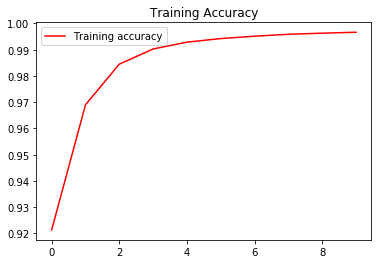

In [19]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
#plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
#plt.title('Training and Validating Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [20]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_7_2_model.h5')